In [1]:
#IMPORT NECESSARY LIBRARIES
import pandas as pd
import numpy as np
from scipy import stats
import math
import random

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

from scipy.stats import chi2_contingency

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [2]:
import pandas as pd
df=pd.read_csv("C:/Users/91939/Downloads/df_balanced.csv")

In [3]:
df.head()

,Number_of_vehicles_involved,Number_of_casualties,Driving_experience,Educational_level,Lanes_or_Medians,Age_band_of_casualty,Age_band_of_driver,Type_of_vehicle_Bajaj,Type_of_vehicle_Bicycle,Type_of_vehicle_Long lorry,...,Time_of_day_Evening,Time_of_day_Midnight,Time_of_day_Morning,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Accident_severity
0,2.0,2.0,3.0,6.0,2.0,3.0,2.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
1,2.0,2.0,6.0,4.0,1.0,3.0,3.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
2,2.0,2.0,3.0,4.0,2.0,4.0,2.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
3,2.0,2.0,5.0,4.0,2.0,3.0,2.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
4,2.0,2.0,4.0,4.0,1.0,3.0,2.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


In [4]:
df.shape

(31245, 57)

In [5]:
df.size

1780965

In [6]:
# Assuming your DataFrame is named 'df'
y = df['Accident_severity']  # Target variable
x = df.drop(columns=['Accident_severity'])  # Features


In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [8]:
X_train.shape

(24996, 56)

In [9]:
X_test.shape

(6249, 56)

In [10]:
y_train.shape

(24996,)

In [11]:
y_test.shape

(6249,)

C:\Users\91939\AppData\Local\Temp\ipykernel_19932\3142396306.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x="Accident_severity", palette=palette)
C:\Users\91939\AppData\Local\Temp\ipykernel_19932\3142396306.py:8: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  ax = sns.countplot(data=df, x="Accident_severity", palette=palette)


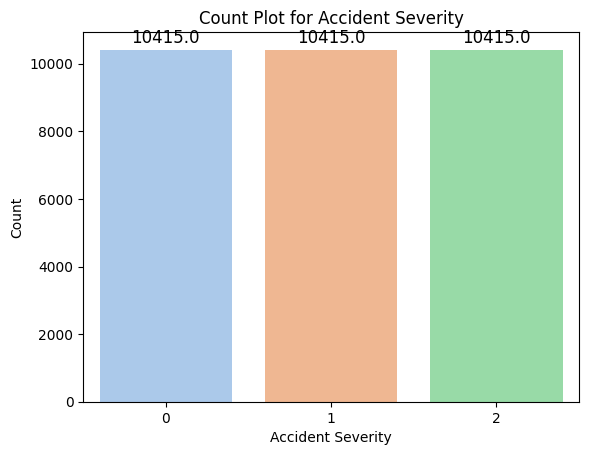

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a light color palette with different colors for each class
palette = sns.color_palette("pastel")

# Create a count plot for the "Accident_severity" column with the custom palette
ax = sns.countplot(data=df, x="Accident_severity", palette=palette)

# Add count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Add a title and labels for better readability
plt.title("Count Plot for Accident Severity")
plt.xlabel("Accident Severity")
plt.ylabel("Count")

# Show the plot
plt.show()


In [13]:
import numpy as np

# Kernel functions
uniform = lambda x, b: (np.abs(x/b) <= 1) and 1/2 or 0
triangle = lambda x, b: (np.abs(x/b) <= 1) and (1 - np.abs(x/b)) or 0
gaussian = lambda x, b: (1.0/np.sqrt(2*np.pi)) * np.exp(-.5 * (x/b)**2)
laplacian = lambda x, b: (1.0/(2*b)) * np.exp(-np.abs(x/b))
epanechnikov = lambda x, b: (np.abs(x/b) <= 1) and ((3/4) * (1 - (x/b)**2)) or 0

# Pattern layer function
def pattern_layer(inp, kernel, sigma):
    k_values = []
    for i, p in enumerate(X_train.values):
        edis = np.linalg.norm(p - inp)  # Find Euclidean distance
        k = kernel(edis, sigma)  # Pass values of Euclidean dist and smoothing parameter to kernel function
        k_values.append(k)
    return k_values

# Summation layer function
def summation_layer(k_values, y_train, class_counts):
    summed = [0, 0, 0]
    for i, c in enumerate(class_counts):
        val = (y_train == class_counts.index[i]).values
        k_values = np.array(k_values)
        summed[i] = np.sum(k_values[val])
    avg_sum = list(summed / y_train.value_counts())
    return avg_sum

# Output layer function
def output_layer(avg_sum, class_counts):
    maxv = max(avg_sum)
    max_index = avg_sum.index(maxv)
    label = class_counts.index[max_index]
    return label

# Bringing all layers together under PNN function
def pnn(X_train, y_train, X_test, kernel, sigma):
    # Initialising variables
    class_counts = y_train.value_counts()
    labels = []
    # Passing each sample observation
    for s in X_test.values:
        k_values = pattern_layer(s, kernel, sigma)
        avg_sum = summation_layer(k_values, y_train, class_counts)
        label = output_layer(avg_sum, class_counts)
        labels.append(label)
    print('Labels Generated for bandwidth:', sigma)
    return labels


Labels Generated for bandwidth: 0.05
Labels Generated for bandwidth: 0.5
Labels Generated for bandwidth: 0.8
Labels Generated for bandwidth: 1
Labels Generated for bandwidth: 0.05
Labels Generated for bandwidth: 0.5
Labels Generated for bandwidth: 0.8
Labels Generated for bandwidth: 1
Labels Generated for bandwidth: 0.05
Labels Generated for bandwidth: 0.5
Labels Generated for bandwidth: 0.8
Labels Generated for bandwidth: 1
          Kernel  Smoothing Param  Accuracy  F1-Score
0       Gaussian             0.05  0.759321  0.753111
1       Gaussian             0.50  0.774204  0.767487
2       Gaussian             0.80  0.615138  0.593160
3       Gaussian             1.00  0.557369  0.522768
4     Triangular             0.05  0.334934  0.170604
5     Triangular             0.50  0.334934  0.170604
6     Triangular             0.80  0.340695  0.182649
7     Triangular             1.00  0.385342  0.264705
8   Epanechnikov             0.05  0.334934  0.170604
9   Epanechnikov             0.

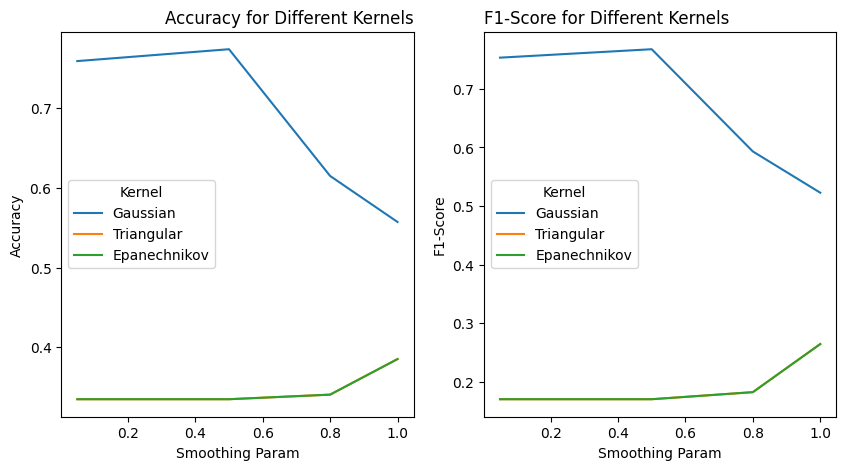

Best combination - Kernel: Gaussian Smoothing Parameter: 0.5
Accuracy: 0.7742038726196191
Classification Report for the Best Combination:
              precision    recall  f1-score   support

           0       0.79      0.69      0.74      2083
           1       0.81      0.65      0.72      2083
           2       0.74      0.99      0.85      2083

    accuracy                           0.77      6249
   macro avg       0.78      0.77      0.77      6249
weighted avg       0.78      0.77      0.77      6249



In [14]:
# Candidate Kernels

best_accuracy = 0
best_kernel = None
best_sigma = None
best_pred = None

kernels = ['Gaussian', 'Triangular', 'Epanechnikov']
sigmas = [0.05, 0.5, 0.8, 1]

results = pd.DataFrame(columns=['Kernel', 'Smoothing Param', 'Accuracy', 'F1-Score'])

for k in kernels:
    if k == 'Gaussian':
        k_func = gaussian
    elif k == 'Triangular':
        k_func = triangle
    else:
        k_func = epanechnikov

    for b in sigmas:
        pred = pnn(X_train, y_train, X_test, k_func, b)  # Use y_train instead of Y_train
        accuracy = accuracy_score(y_test.values, pred)  # Use y_test directly
        f1 = f1_score(y_test.values, pred, average='weighted')  # Use y_test directly
        results.loc[len(results.index)] = [k, b, accuracy, f1]

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_kernel = k
            best_sigma = b
            best_pred = pred

print(results)

plt.rcParams['figure.figsize'] = [10, 5]

# Plot Accuracy for Different Kernels
plt.subplot(121)
sns.lineplot(y=results['Accuracy'], x=results['Smoothing Param'], hue=results['Kernel'])
plt.title('Accuracy for Different Kernels', loc='right')

# Plot F1-Score for Different Kernels
plt.subplot(122)
sns.lineplot(y=results['F1-Score'], x=results['Smoothing Param'], hue=results['Kernel'])
plt.title('F1-Score for Different Kernels', loc='left')

plt.show()

print("Best combination - Kernel:", best_kernel, "Smoothing Parameter:", best_sigma)
print("Accuracy:", best_accuracy)

# Generate classification report for the best combination
best_classification_report = classification_report(y_test.values, best_pred)  # Use y_test directly
print("Classification Report for the Best Combination:")
print(best_classification_report)


In [15]:
# Check the length of Y_test and best_pred
print("Length of Y_test:", len(y_test))
print("Length of best_pred:", len(best_pred))

# If lengths don't match, investigate where best_pred is generated
# Ensure that best_pred is created using the same X_test as Y_test


Length of Y_test: 6249
Length of best_pred: 6249


In [16]:
print(results)

          Kernel  Smoothing Param  Accuracy  F1-Score
0       Gaussian             0.05  0.759321  0.753111
1       Gaussian             0.50  0.774204  0.767487
2       Gaussian             0.80  0.615138  0.593160
3       Gaussian             1.00  0.557369  0.522768
4     Triangular             0.05  0.334934  0.170604
5     Triangular             0.50  0.334934  0.170604
6     Triangular             0.80  0.340695  0.182649
7     Triangular             1.00  0.385342  0.264705
8   Epanechnikov             0.05  0.334934  0.170604
9   Epanechnikov             0.50  0.334934  0.170604
10  Epanechnikov             0.80  0.340695  0.182649
11  Epanechnikov             1.00  0.385342  0.264705


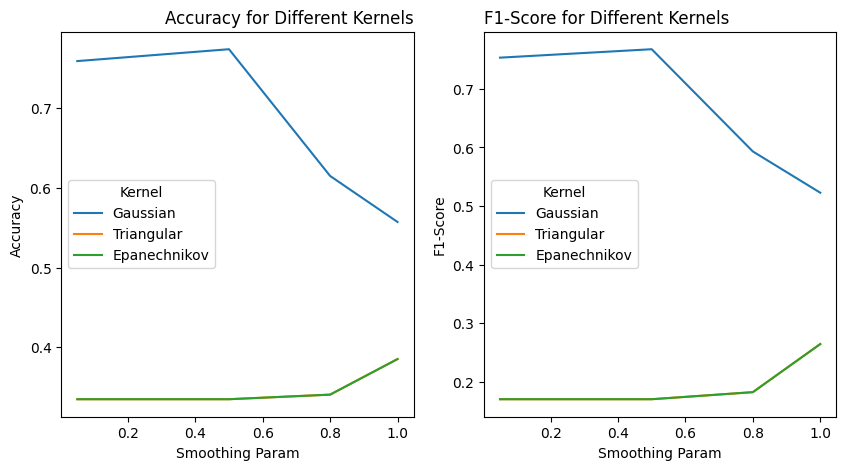

In [17]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.subplot(121)
sns.lineplot(y=results['Accuracy'],x=results['Smoothing Param'],hue=results['Kernel']);
plt.title('Accuracy for Different Kernels',loc='right');

plt.subplot(122)
sns.lineplot(y=results['F1-Score'],x=results['Smoothing Param'],hue=results['Kernel']);
plt.title('F1-Score for Different Kernels',loc='left');

plt.show()

In [18]:
from xgboost import XGBClassifier

In [19]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials, space_eval
from xgboost import XGBClassifier
import numpy as np
import random

np.random.seed(42)
random.seed(42)

# Define the search space for hyperparameters
space = {
    'n_estimators': hp.choice('n_estimators', [100, 300, 500]),
    'max_depth': hp.choice('max_depth', [3, 5, 7]),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
    'subsample': hp.uniform('subsample', 0.7, 0.9),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.7, 0.9),
    'gamma': hp.uniform('gamma', 0, 0.3),
    'reg_alpha': hp.uniform('reg_alpha', 0, 0.3),
    'reg_lambda': hp.uniform('reg_lambda', 0, 0.3),
    'min_child_weight': hp.choice('min_child_weight', [1, 3, 5]),
    'scale_pos_weight': hp.choice('scale_pos_weight', [1, 3, 5])
}

# Define objective function for optimization
def objective(params):
    scale_pos_weight = params.pop('scale_pos_weight')  # Remove and store 'scale_pos_weight'
    model = XGBClassifier(**params, scale_pos_weight=scale_pos_weight, random_state=23)
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=23)
    score = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy').mean()

    return {'loss': -score, 'status': STATUS_OK}

# Initialize Trials object
trials = Trials()

# Run Hyperopt optimization
best = fmin(objective, space, algo=tpe.suggest, max_evals=50, trials=trials)

# Get the best hyperparameters
best_params = space_eval(space, best)

print("Best Hyperparameters:", best_params)


  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:46:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:46:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:46:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, 

  2%|▏         | 1/50 [00:10<08:56, 10.95s/trial, best loss: -0.9414706353016483]

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:46:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:47:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:47:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, 

  4%|▍         | 2/50 [00:31<13:22, 16.72s/trial, best loss: -0.9414706353016483]

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:47:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:47:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:47:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, 

  6%|▌         | 3/50 [00:35<08:34, 10.95s/trial, best loss: -0.9417506801088175]

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:47:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:47:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:47:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, 

  8%|▊         | 4/50 [00:39<06:08,  8.00s/trial, best loss: -0.9417506801088175]

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:47:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:47:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:47:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, 

 10%|█         | 5/50 [00:42<04:48,  6.41s/trial, best loss: -0.9417506801088175]

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:47:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:47:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:47:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, 

 12%|█▏        | 6/50 [00:54<05:56,  8.10s/trial, best loss: -0.9417506801088175]

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:47:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:47:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:47:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, 

 14%|█▍        | 7/50 [00:59<05:04,  7.07s/trial, best loss: -0.9419507121139383]

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:47:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:47:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:47:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, 

 16%|█▌        | 8/50 [01:06<04:56,  7.06s/trial, best loss: -0.9419507121139383]

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:47:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:47:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:47:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, 

 18%|█▊        | 9/50 [01:22<06:47,  9.95s/trial, best loss: -0.9419507121139383]

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:48:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:48:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:48:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, 

 20%|██        | 10/50 [01:29<06:06,  9.17s/trial, best loss: -0.9419507121139383]

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:48:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:48:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:48:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, 

 22%|██▏       | 11/50 [01:32<04:39,  7.17s/trial, best loss: -0.9419507121139383]

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:48:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:48:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:48:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, 

 24%|██▍       | 12/50 [01:39<04:28,  7.07s/trial, best loss: -0.9419507121139383]

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:48:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:48:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:48:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, 

 26%|██▌       | 13/50 [01:46<04:22,  7.09s/trial, best loss: -0.9419507121139383]

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:48:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:48:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:48:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, 

 28%|██▊       | 14/50 [01:58<05:04,  8.46s/trial, best loss: -0.9419507121139383]

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:48:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:48:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:48:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, 

 30%|███       | 15/50 [02:05<04:41,  8.05s/trial, best loss: -0.9419507121139383]

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:48:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:48:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:48:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, 

 32%|███▏      | 16/50 [02:21<05:55, 10.44s/trial, best loss: -0.9419507121139383]

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:49:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:49:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:49:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, 

 34%|███▍      | 17/50 [02:32<05:47, 10.54s/trial, best loss: -0.9419507121139383]

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:49:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:49:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:49:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, 

 36%|███▌      | 18/50 [02:46<06:18, 11.81s/trial, best loss: -0.9419507121139383]

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:49:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:49:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:49:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, 

 38%|███▊      | 19/50 [02:57<05:53, 11.41s/trial, best loss: -0.9419507121139383]

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:49:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:49:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:49:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, 

 40%|████      | 20/50 [03:02<04:44,  9.50s/trial, best loss: -0.9419507121139383]

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:49:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:49:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:49:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, 

 42%|████▏     | 21/50 [03:07<03:53,  8.05s/trial, best loss: -0.9419507121139383]

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:49:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:49:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:49:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, 

 44%|████▍     | 22/50 [03:12<03:20,  7.15s/trial, best loss: -0.9419507121139383]

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:49:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:49:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:49:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, 

 46%|████▌     | 23/50 [03:17<02:58,  6.61s/trial, best loss: -0.9419507121139383]

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:49:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:50:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:50:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, 

 48%|████▊     | 24/50 [03:22<02:40,  6.19s/trial, best loss: -0.9419507121139383]

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:50:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:50:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:50:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, 

 50%|█████     | 25/50 [03:27<02:27,  5.88s/trial, best loss: -0.9419507121139383]

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:50:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:50:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:50:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, 

 52%|█████▏    | 26/50 [03:32<02:14,  5.59s/trial, best loss: -0.9421507441190591]

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:50:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:50:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:50:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, 

 54%|█████▍    | 27/50 [03:38<02:11,  5.73s/trial, best loss: -0.9421507441190591]

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:50:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:50:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:50:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, 

 56%|█████▌    | 28/50 [03:44<02:04,  5.65s/trial, best loss: -0.9421507441190591]

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:50:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:50:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:50:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, 

 58%|█████▊    | 29/50 [03:57<02:45,  7.88s/trial, best loss: -0.9421507441190591]

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:50:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:50:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:50:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, 

 60%|██████    | 30/50 [04:02<02:21,  7.08s/trial, best loss: -0.9421507441190591]

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:50:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:50:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:50:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, 

 62%|██████▏   | 31/50 [04:18<03:03,  9.65s/trial, best loss: -0.9421507441190591]

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:51:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:51:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:51:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, 

 64%|██████▍   | 32/50 [04:23<02:29,  8.30s/trial, best loss: -0.9421507441190591]

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:51:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:51:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:51:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, 

 66%|██████▌   | 33/50 [04:28<02:05,  7.39s/trial, best loss: -0.9421507441190591]

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:51:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:51:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:51:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, 

 68%|██████▊   | 34/50 [04:32<01:40,  6.28s/trial, best loss: -0.9421507441190591]

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:51:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:51:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:51:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, 

 70%|███████   | 35/50 [04:47<02:12,  8.83s/trial, best loss: -0.9421507441190591]

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:51:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:51:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:51:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, 

 72%|███████▏  | 36/50 [04:50<01:41,  7.22s/trial, best loss: -0.9421507441190591]

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:51:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:51:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:51:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, 

 74%|███████▍  | 37/50 [04:54<01:22,  6.36s/trial, best loss: -0.9421507441190591]

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:51:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:51:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:51:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, 

 76%|███████▌  | 38/50 [04:58<01:07,  5.59s/trial, best loss: -0.9421507441190591]

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:51:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:51:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:51:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, 

 78%|███████▊  | 39/50 [05:10<01:22,  7.50s/trial, best loss: -0.9421507441190591]

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:51:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:51:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:51:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, 

 80%|████████  | 40/50 [05:14<01:04,  6.41s/trial, best loss: -0.9421507441190591]

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:51:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:51:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:51:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, 

 82%|████████▏ | 41/50 [05:18<00:50,  5.61s/trial, best loss: -0.9421507441190591]

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:52:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:52:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:52:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, 

 84%|████████▍ | 42/50 [05:21<00:39,  4.99s/trial, best loss: -0.9421507441190591]

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:52:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:52:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:52:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, 

 86%|████████▌ | 43/50 [05:34<00:51,  7.30s/trial, best loss: -0.9421507441190591]

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:52:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:52:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:52:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, 

 88%|████████▊ | 44/50 [05:37<00:35,  5.93s/trial, best loss: -0.9421507441190591]

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:52:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:52:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:52:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, 

 90%|█████████ | 45/50 [05:40<00:26,  5.25s/trial, best loss: -0.9421507441190591]

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:52:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:52:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:52:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, 

 92%|█████████▏| 46/50 [05:43<00:17,  4.45s/trial, best loss: -0.9421507441190591]

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:52:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:52:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:52:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, 

 94%|█████████▍| 47/50 [05:57<00:21,  7.20s/trial, best loss: -0.9421507441190591]

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:52:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:52:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:52:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, 

 96%|█████████▌| 48/50 [05:59<00:11,  5.83s/trial, best loss: -0.9421507441190591]

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:52:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:52:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:52:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, 

 98%|█████████▊| 49/50 [06:10<00:07,  7.34s/trial, best loss: -0.9421507441190591]

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:52:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:52:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:52:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, 

100%|██████████| 50/50 [06:15<00:00,  7.51s/trial, best loss: -0.9421507441190591]
Best Hyperparameters: {'colsample_bytree': 0.7185699910758756, 'gamma': 0.21120214659590408, 'learning_rate': 0.14307574778752963, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 100, 'reg_alpha': 0.12736558663962858, 'reg_lambda': 0.1414372925822152, 'scale_pos_weight': 3, 'subsample': 0.881348350713407}


In [20]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Initialize the model with the best parameters
best_model = XGBClassifier(**best_params, random_state=23)

# Fit the model to the training data
best_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("TEST Accuracy:", accuracy)

print(f"F1 score is {f1_score(y_test, y_pred, average='macro')}")

# F1 score is very low due to the class imbalance
pred_train = best_model.predict(X_train)
print('TRAIN Accuracy: ', accuracy_score(y_train, pred_train), '\n')
print('Classification Report:')
print(classification_report(y_test, y_pred))


C:\Users\91939\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:52:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


TEST Accuracy: 0.9342294767162747
F1 score is 0.9342150561132295
TRAIN Accuracy:  0.9496319411105777 

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2083
           1       0.99      0.83      0.90      2083
           2       1.00      0.98      0.99      2083

    accuracy                           0.93      6249
   macro avg       0.94      0.93      0.93      6249
weighted avg       0.94      0.93      0.93      6249



In [21]:
#USING SHAP
import shap
explainer=shap.TreeExplainer(model=best_model,
                             data=None,
                             model_output='raw',
                             feature_perturbation='tree_path_dependant')

In [22]:
shap_values=explainer.shap_values(X_test)
#example, for 1 instance
shap_values_eg=explainer.shap_values(X_test[1:2])
print(shap_values_eg.shape)
print(shap_values_eg)

(1, 56, 3)
[[[-1.23922668e-01 -1.28625184e-01 -3.96733359e-02]
  [-2.02664688e-01 -3.53856534e-01  3.64859045e-01]
  [-1.31040022e-01 -8.33368897e-02  2.38995358e-01]
  [-6.69782609e-02  5.37379831e-03  4.02434096e-02]
  [-3.97807062e-02 -9.60590434e-04 -1.83410585e-01]
  [-2.95846984e-02 -3.68852764e-02  4.82625663e-02]
  [-3.73685770e-02 -2.88839694e-02  1.11238705e-02]
  [ 0.00000000e+00 -3.75951678e-01  8.00553203e-01]
  [-4.49634254e-01 -2.55513238e-04  1.54896628e-03]
  [-3.72616276e-02  2.25757807e-02  1.61696551e-03]
  [-1.24563150e-01  5.82732596e-02 -1.35945054e-02]
  [-3.38175073e-02 -6.32895855e-03 -8.00397899e-03]
  [-1.58648759e-01 -1.07463872e+00  1.93337607e+00]
  [-1.04773328e-01 -3.34525295e-02  1.82087764e-01]
  [-3.68988104e-02 -6.19045692e-03  1.35322968e-02]
  [-6.60043359e-02 -6.38418272e-02  2.00605184e-01]
  [-1.57257959e-01 -2.34917272e-02  3.18939537e-02]
  [-1.68881863e-02 -4.60651554e-02  3.84587236e-02]
  [-4.83176932e-02 -3.65145355e-02  4.67256643e-03]
 

In [23]:
print(f'shape of test dataset: {X_test.shape}')
print(f'Type of shap_values: {type (shap_values)}. Length of the list: {len(shap_values)}')
print (f'Shape of shap_values: {np.array (shap_values).shape}')

shape of test dataset: (6249, 56)
Type of shap_values: <class 'numpy.ndarray'>. Length of the list: 6249
Shape of shap_values: (6249, 56, 3)


In [24]:
df.dtypes


Number_of_vehicles_involved                               float64
Number_of_casualties                                      float64
Driving_experience                                        float64
Educational_level                                         float64
Lanes_or_Medians                                          float64
Age_band_of_casualty                                      float64
Age_band_of_driver                                        float64
Type_of_vehicle_Bajaj                                     float64
Type_of_vehicle_Bicycle                                   float64
Type_of_vehicle_Long lorry                                float64
Type_of_vehicle_Lorry (11?40Q)                            float64
Type_of_vehicle_Lorry (41?100Q)                           float64
Type_of_vehicle_Motorcycle                                float64
Type_of_vehicle_Pick up upto 10Q                          float64
Type_of_vehicle_Public (12 seats)                         float64
Type_of_ve

Number of columns in X_test: 56
Mean absolute SHAP value for Number_of_vehicles_involved: 0.11007465422153473
Mean absolute SHAP value for Number_of_casualties: 0.13484728336334229
Mean absolute SHAP value for Driving_experience: 0.12483731657266617
Mean absolute SHAP value for Educational_level: 0.04760051146149635
Mean absolute SHAP value for Lanes_or_Medians: 0.07933452725410461
Mean absolute SHAP value for Age_band_of_casualty: 0.04624173790216446
Mean absolute SHAP value for Age_band_of_driver: 0.05347049608826637
Mean absolute SHAP value for Type_of_vehicle_Bajaj: 0.30758851766586304
Mean absolute SHAP value for Type_of_vehicle_Bicycle: 0.1266889125108719
Mean absolute SHAP value for Type_of_vehicle_Long lorry: 0.01718427985906601
Mean absolute SHAP value for Type_of_vehicle_Lorry (11?40Q): 0.0297525767236948
Mean absolute SHAP value for Type_of_vehicle_Lorry (41?100Q): 0.023442760109901428
Mean absolute SHAP value for Type_of_vehicle_Motorcycle: 0.5678489208221436
Mean absolute 

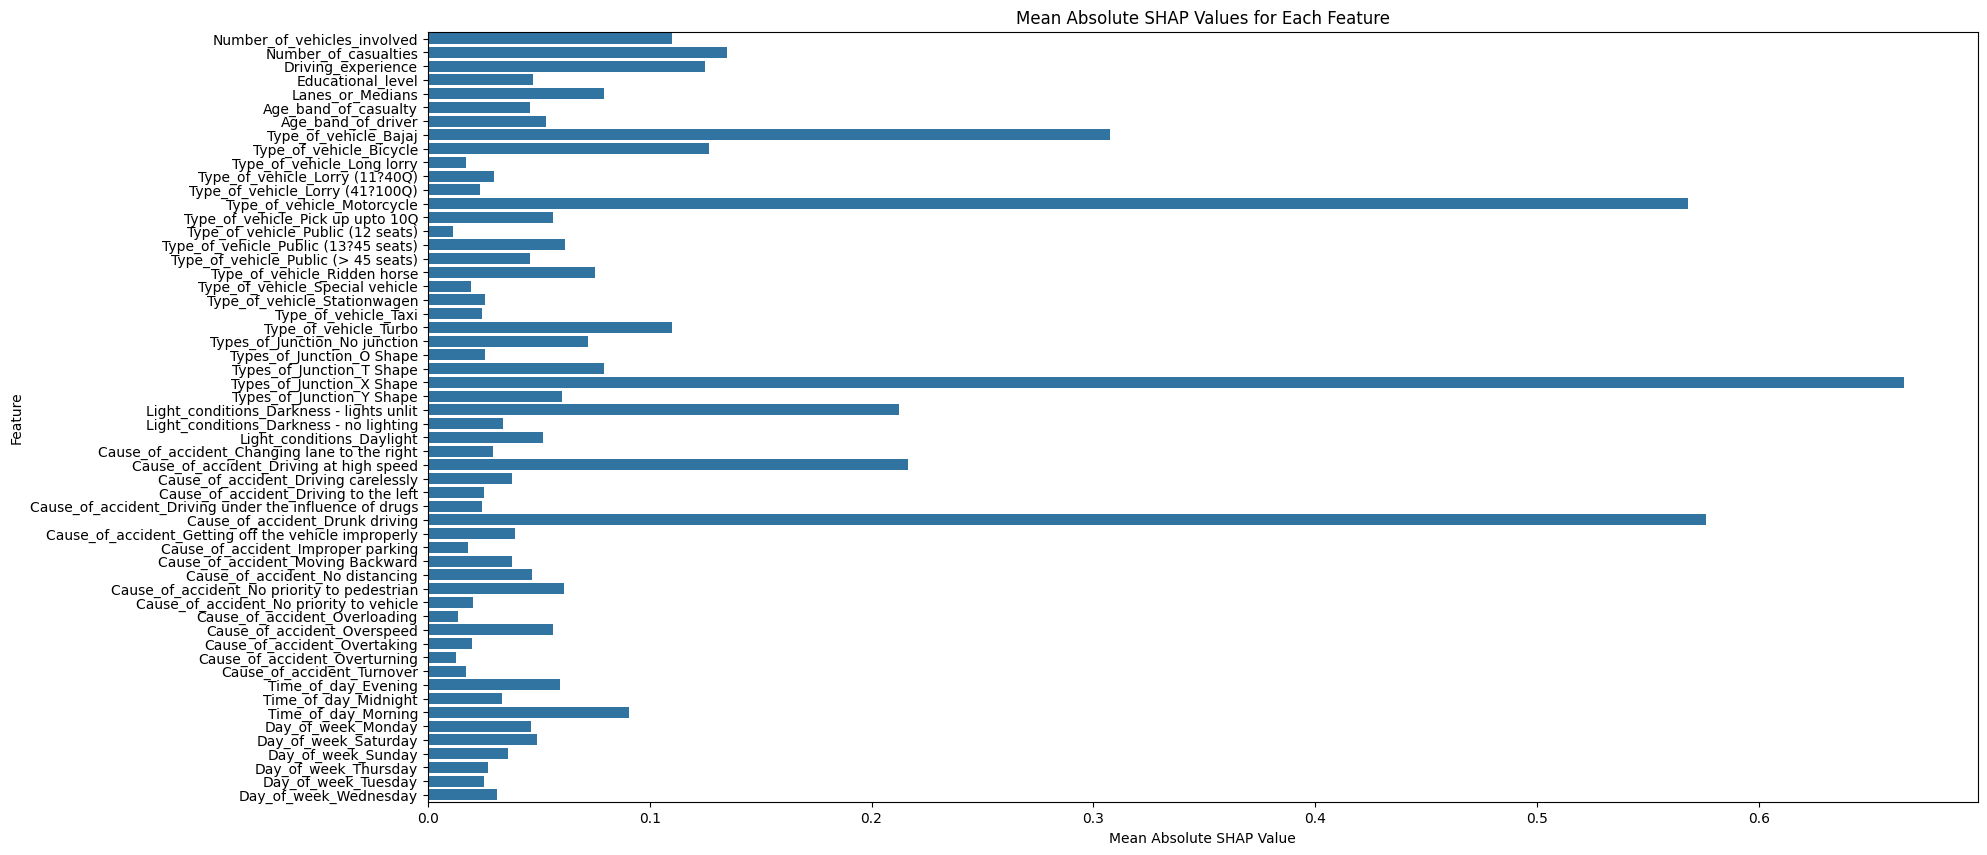

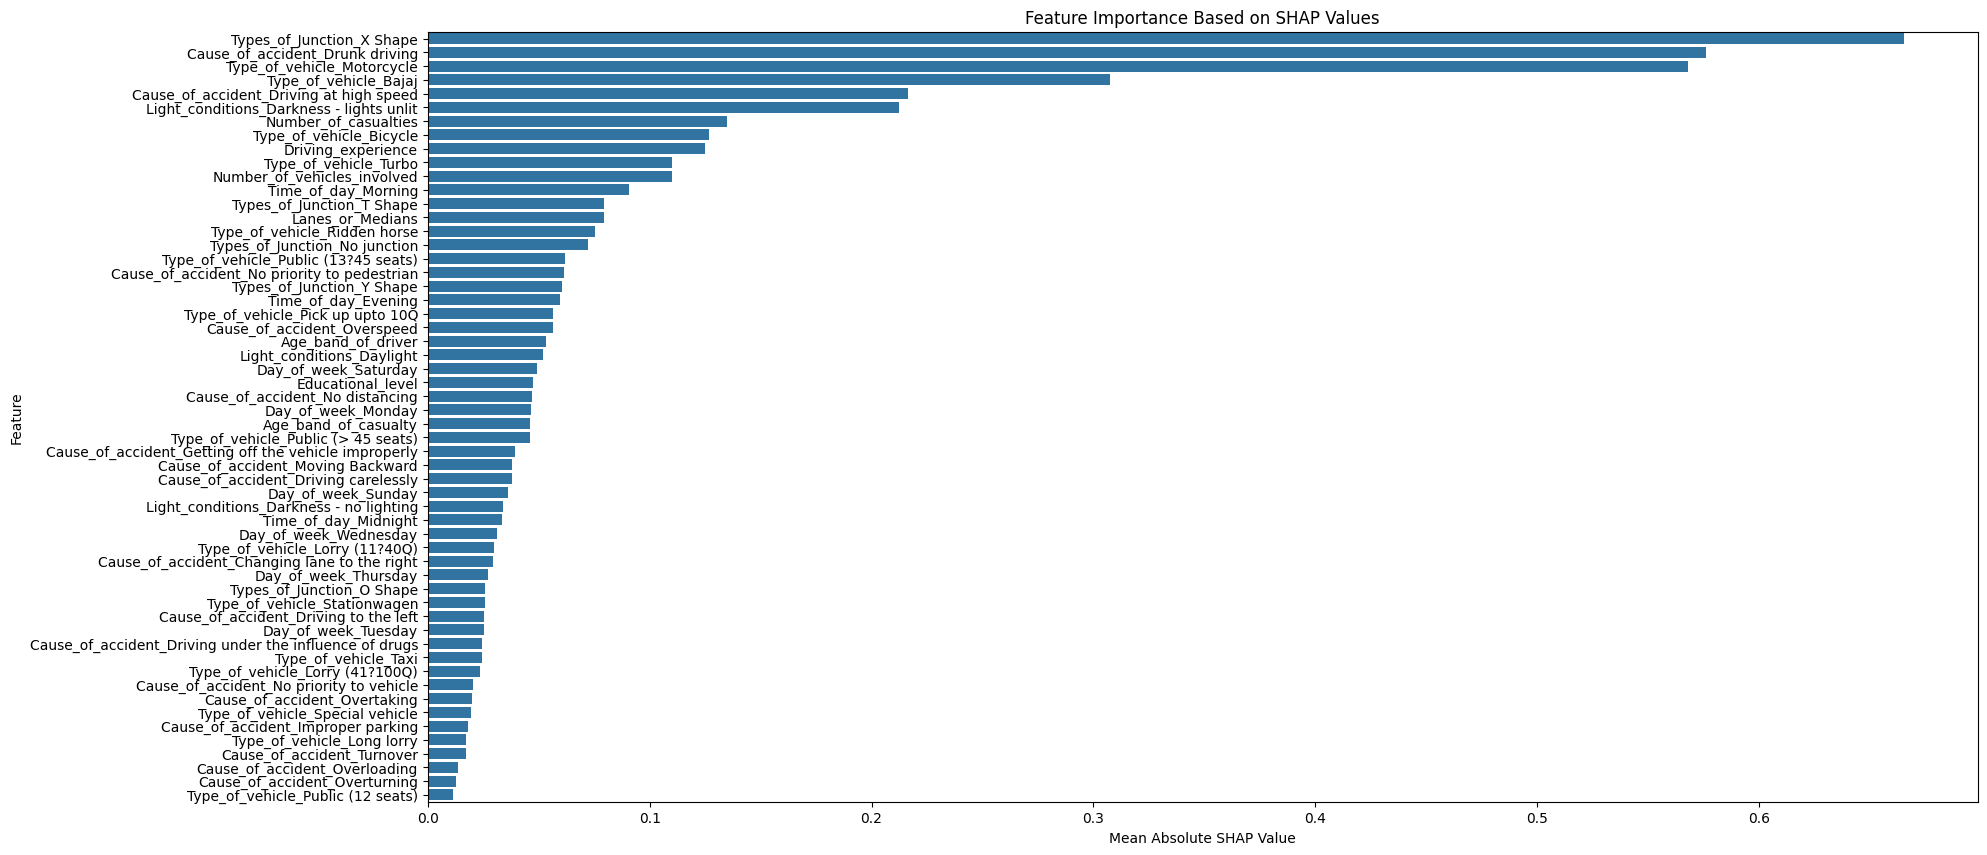

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate SHAP values for X_test
shap_values = explainer(X_test)

# Print the number of columns
num_columns = X_test.shape[1]
print(f"Number of columns in X_test: {num_columns}")

# Calculate and print the mean absolute SHAP value for each numerical column
mean_abs_shap_values = []
feature_names = []

for i, column in enumerate(X_test.columns):
    # Access SHAP values using integer indexing
    mean_abs_shap = np.mean(np.abs(shap_values.values[:, i]))
    mean_abs_shap_values.append(mean_abs_shap)
    feature_names.append(column)
    print(f"Mean absolute SHAP value for {column}: {mean_abs_shap}")

# If you want to sort the features by importance
feature_importance = [(column, np.mean(np.abs(shap_values.values[:, i]))) for i, column in enumerate(X_test.columns)]
sorted_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)

print("\nFeatures sorted by importance:")
for feature, importance in sorted_importance:
    print(f"{feature}: {importance}")

# Plot mean absolute SHAP values
plt.figure(figsize=(20, 10))
sns.barplot(x=mean_abs_shap_values, y=feature_names)
plt.xlabel('Mean Absolute SHAP Value')
plt.ylabel('Feature')
plt.title('Mean Absolute SHAP Values for Each Feature')
plt.show()

# Plot sorted feature importance
sorted_features, sorted_importances = zip(*sorted_importance)

plt.figure(figsize=(20, 10))
sns.barplot(x=sorted_importances, y=sorted_features)
plt.xlabel('Mean Absolute SHAP Value')
plt.ylabel('Feature')
plt.title('Feature Importance Based on SHAP Values')
plt.show()


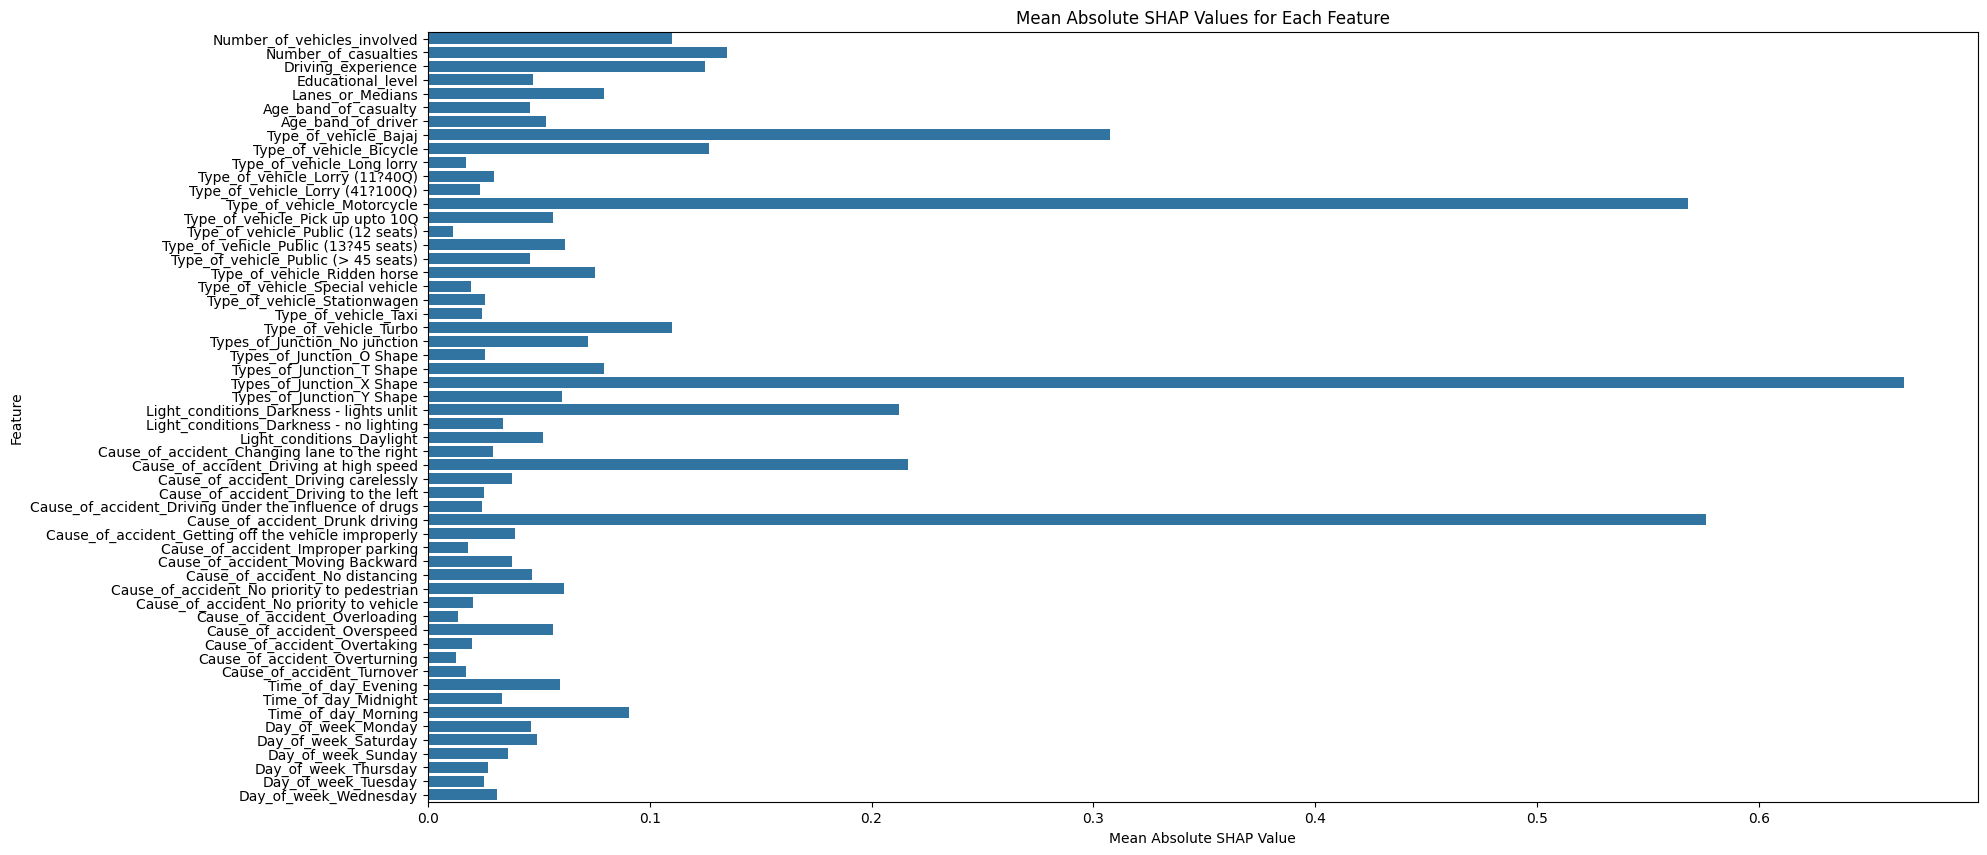

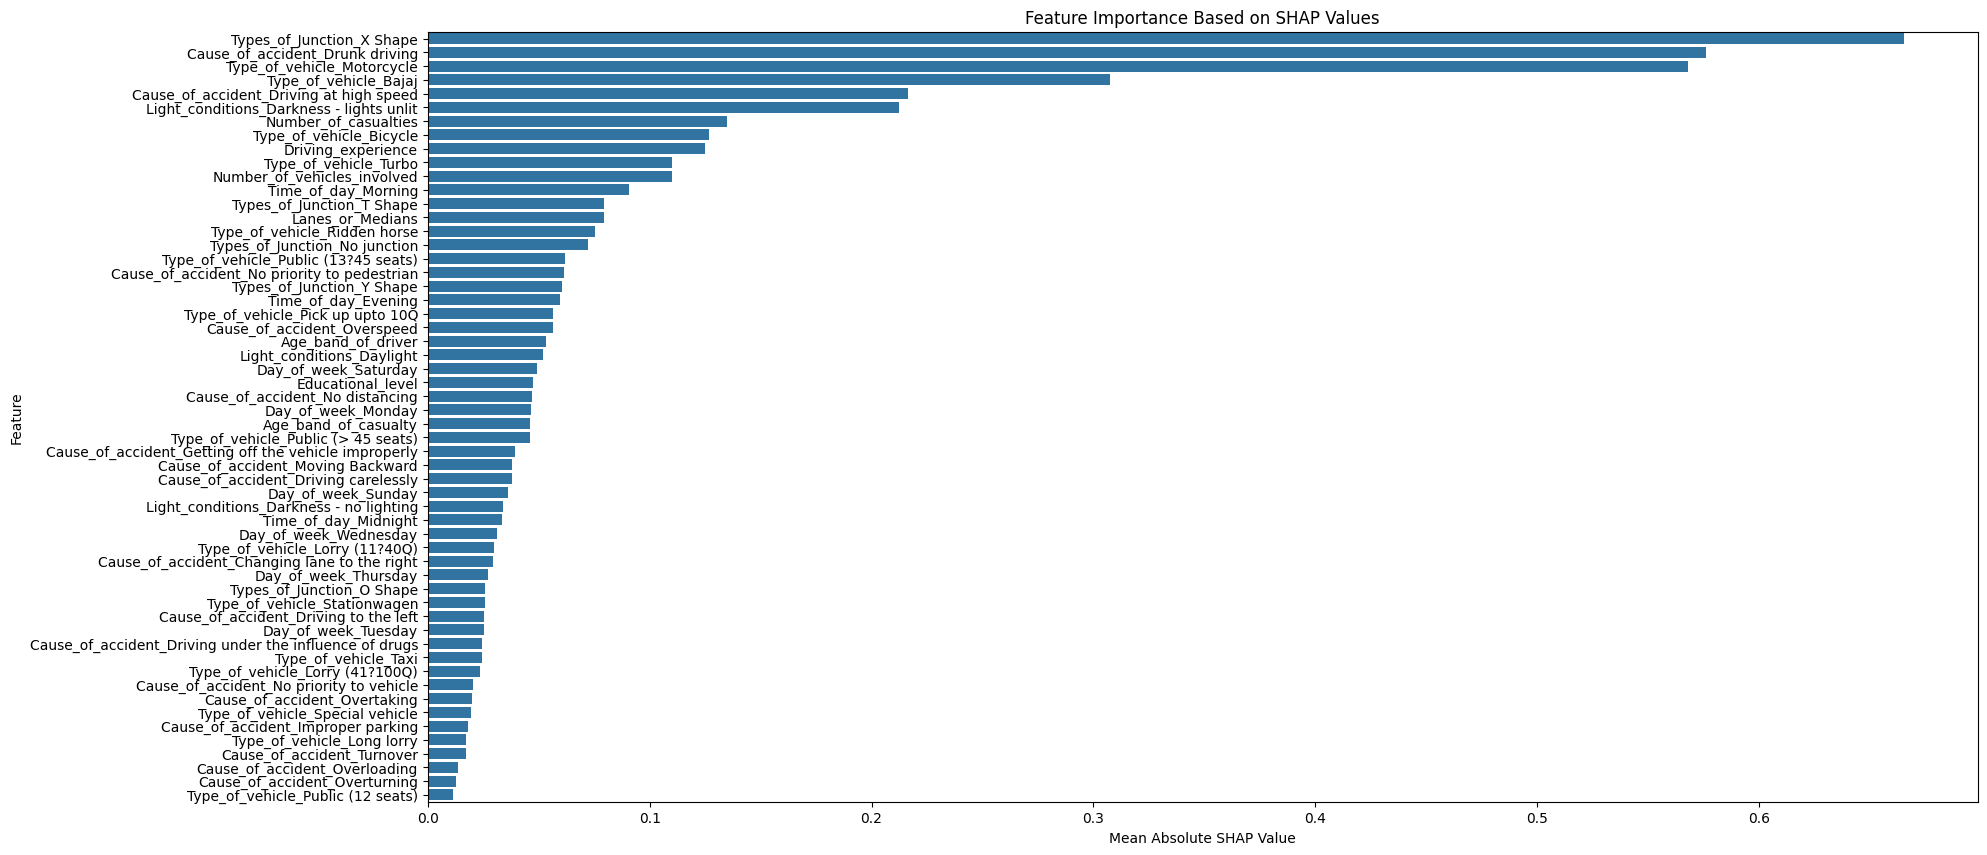

In [26]:
# Plot mean absolute SHAP values
plt.figure(figsize=(20, 10))
sns.barplot(x=mean_abs_shap_values, y=feature_names)
plt.xlabel('Mean Absolute SHAP Value')
plt.ylabel('Feature')
plt.title('Mean Absolute SHAP Values for Each Feature')
plt.show()

# Plot sorted feature importance
sorted_features, sorted_importances = zip(*sorted_importance)

plt.figure(figsize=(20, 10))
sns.barplot(x=sorted_importances, y=sorted_features)
plt.xlabel('Mean Absolute SHAP Value')
plt.ylabel('Feature')
plt.title('Feature Importance Based on SHAP Values')
plt.show()


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials, space_eval
import numpy as np
import random

np.random.seed(42)
random.seed(42)

# Define the search space for hyperparameters specific to RandomForestClassifier
space = {
    'n_estimators': hp.choice('n_estimators', [100, 300, 500]),
    'max_depth': hp.choice('max_depth', [None, 10, 20, 30]),
    'min_samples_split': hp.choice('min_samples_split', [2, 5, 10]),
    'min_samples_leaf': hp.choice('min_samples_leaf', [1, 2, 4]),
    'max_features': hp.choice('max_features', ['sqrt', 'log2', 0.5]),  # Replaced 'auto' with valid options
    'bootstrap': hp.choice('bootstrap', [True, False]),
}

# Define the objective function for optimization
def objective(params):
    model = RandomForestClassifier(**params, random_state=23)
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=23)
    score = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy').mean()

    return {'loss': -score, 'status': STATUS_OK}

# Initialize Trials object
trials = Trials()

# Run Hyperopt optimization
best = fmin(objective, space, algo=tpe.suggest, max_evals=50, trials=trials)

# Get the best hyperparameters
best_params = space_eval(space, best)

print("Best Hyperparameters:", best_params)


100%|██████████| 50/50 [3:29:43<00:00, 251.67s/trial, best loss: -0.9423507761241798]  
Best Hyperparameters: {'bootstrap': True, 'max_depth': 30, 'max_features': 0.5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Initialize the model with the best parameters
best_model = RandomForestClassifier(**best_params, random_state=23)

# Fit the model to the training data
best_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("TEST Accuracy:", accuracy)   

# Evaluate F1 score
print(f"F1 score is {f1_score(y_test, y_pred, average='macro')}")

# F1 score might be low due to class imbalance
pred_train = best_model.predict(X_train)
print('TRAIN Accuracy:', accuracy_score(y_train, pred_train), '\n')
print('Classification Report:')
print(classification_report(y_test, y_pred))


TEST Accuracy: 0.9342294767162747
F1 score is 0.9342277048346489
TRAIN Accuracy: 0.9607137141942711 

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2083
           1       0.99      0.83      0.90      2083
           2       1.00      0.98      0.99      2083

    accuracy                           0.93      6249
   macro avg       0.94      0.93      0.93      6249
weighted avg       0.94      0.93      0.93      6249

